## To Predict the future stock price using ARIMA

###  ARIMA stands for Auto Regressive Integrated Moving Average
It is a time series model which is used to as the machine learning technique to analyse and predict future stock prices based on historical prices. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df= pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-28,32.965000,32.987499,32.775002,32.945000,30.031921,122933200
1,2015-05-29,32.807499,32.862499,32.474998,32.570000,29.690079,203538000
2,2015-06-01,32.570000,32.847500,32.512501,32.634998,29.749327,128451200
3,2015-06-02,32.465000,32.665001,32.330002,32.490002,29.617155,134670400
4,2015-06-03,32.665001,32.735001,32.474998,32.529999,29.653614,123934000


### Performing Exploratory Data Analysis 
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

In [3]:
df.shape

(1259, 7)

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,41.955026,42.375441,41.576178,41.997540,40.294034,1.404843e+08
std,14.226637,14.446750,14.072141,14.282829,14.593040,6.916565e+07
min,22.500000,22.917500,22.367500,22.584999,21.009535,4.544800e+07
25%,29.123750,29.352500,28.903749,29.088751,27.078641,9.485540e+07
50%,40.105000,40.549999,39.772499,40.215000,38.277523,1.231640e+08
75%,49.912498,50.363748,49.573749,50.015001,48.774755,1.655616e+08
max,81.184998,81.962502,80.837502,81.800003,80.691216,6.488252e+08


Conclusions:
- Opening mean price is 41.95
- Highest mean price is 42.37
- Lowest mean price is 41.57
- Closing mean price is 41.99

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Conclusion: There is no null values in all column as it can be seen above

### Basic Manipulations

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-28,32.965000,32.987499,32.775002,32.945000,30.031921,122933200
1,2015-05-29,32.807499,32.862499,32.474998,32.570000,29.690079,203538000
2,2015-06-01,32.570000,32.847500,32.512501,32.634998,29.749327,128451200
3,2015-06-02,32.465000,32.665001,32.330002,32.490002,29.617155,134670400
4,2015-06-03,32.665001,32.735001,32.474998,32.529999,29.653614,123934000


In [9]:
df1=df.groupby(['Date'])['Close'].mean()

<AxesSubplot:title={'center':'Closing Price of APPLE shares'}, xlabel='Date'>

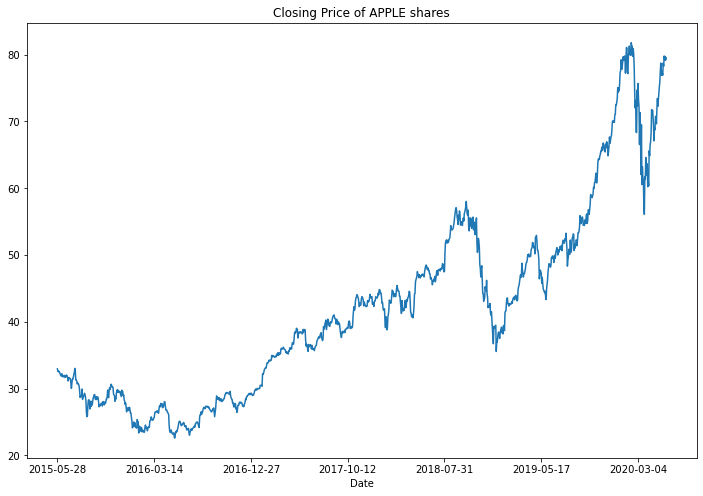

In [10]:
df1.plot(figsize=(12,8), title="Closing Price of APPLE shares")

## More Imports

In [11]:
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [12]:
plt.rcParams["figure.figsize"] = (12,8)

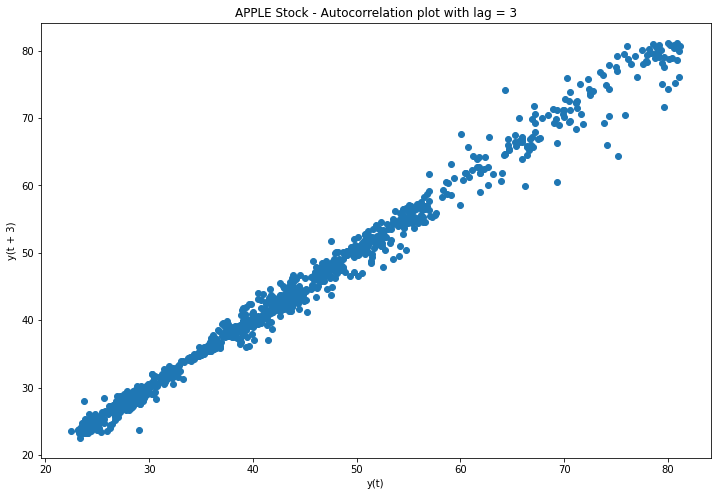

In [13]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('APPLE Stock - Autocorrelation plot with lag = 3')
plt.show()

**Note** As there is autocorrelation in the data, ARIMA model works well. Generally, ARIMA is applied to this type of data

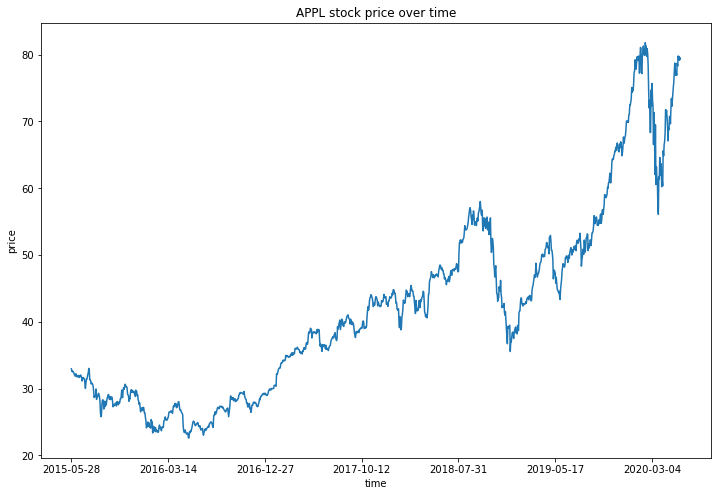

In [14]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,1259, 200), df['Date'][0:1259:200])
plt.title("APPL stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

## Building ARIMA Model

#### Data Split for this project
- 80% training data
- 20% test data

#### ARIMA Model parameters:
- p : number of lag observations
- d : degree of differencing 
- q : size of moving avg window

##### ARIMA model parameters used in this project  is as follows:
- p=4
- d=1
- q=0

In [15]:
train_data, test_data = df[0:int(1259*0.8)], df[int(1259*0.8):]

In [16]:
print("Train_data.shape=",train_data.shape)
print("test_data.shape=", test_data.shape)

Train_data.shape= (1007, 7)
test_data.shape= (252, 7)


**Note** 
In this project we have considered the closing stock price for predictions

In [17]:
train_data = train_data['Close'].values

In [18]:
train_data

array([32.945   , 32.57    , 32.634998, ..., 44.915001, 44.7425  ,
       44.557499])

In [19]:
test_data = test_data['Close'].values

In [20]:
test_data

array([44.345001, 44.575001, 43.767502, 43.325001, 44.91    , 45.634998,
       46.305   , 47.537498, 48.145   , 48.702499, 48.547501, 48.537498,
       48.185001, 48.4725  , 49.612499, 49.467499, 49.865002, 49.695   ,
       49.645   , 48.892502, 49.950001, 49.935001, 49.48    , 50.387501,
       50.682499, 51.102501, 51.057499, 50.005001, 50.310001, 50.807499,
       50.4375  , 50.825001, 51.302502, 51.125   , 50.837502, 51.415001,
       50.647499, 51.805   , 52.209999, 52.1675  , 51.755001, 51.935001,
       52.419998, 52.195   , 53.259998, 52.107498, 51.005001, 48.334999,
       49.25    , 49.759998, 50.857498, 50.247501, 50.119999, 52.2425  ,
       50.6875  , 50.435001, 51.625   , 52.587502, 52.59    , 53.16    ,
       53.115002, 50.66    , 51.622501, 51.040001, 51.3825  , 52.252499,
       52.185001, 51.424999, 52.297501, 53.32    , 53.314999, 53.5425  ,
       54.174999, 55.897499, 55.772499, 54.6875  , 54.974998, 55.174999,
       55.692501, 55.240002, 54.432499, 54.68    , 

In [21]:
history = [x for x in train_data]
model_predictions = []
N_test_observations = len(test_data)

In [22]:
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

In [23]:
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 2.724544219400428


### Observation & Conclusion:
- Mean Squared Error is around 2.72 which is very low.
- Our prediction are very close to actual values. 

Below is graph which shows comparision between Predicted price and Actual price on test data. 

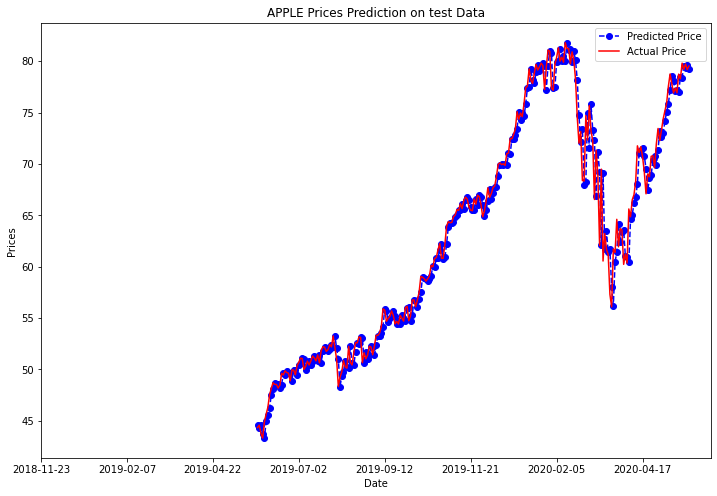

In [24]:
test_set_range = df[int(1259*0.8):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('APPLE Prices Prediction on test Data')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()

**Conclusion**
ARIMA model works quite well in predicting future stock market prices as it can be visualised with the above graph and MSE values